# Algoritam K-sredina

Algoritam `k-sredina` (engl. k-means) je algoritam klasterovanja koji pronalazi `k` klastera u skupu podataka. Svaki od klastera je predstavljen pomoću centroide tj. centra klastera. 

Polaznih `k` centroida se bira nasumično, a potom se ponavljaju sledeći koraci:

1. instance se raspoređuju u nove klastere tako što se svaka instanca pridružuje klasteru određenim najbližom centroidom

2. izračunavaju se nove centroide kao prosek instanci klastera koje su mu pridružene


Ovi koraci se izvršavaju sve dok se centroide ne stabilizuju. Kada centroide postanu iste (do na zadatu tačnost) u dvema uzastopnim iteracijama, algoritam se zaustavlja.

Ukoliko korisnik zna nešto o strukturi svojih podataka, početne centroide se mogu i pažljivije odabrati.

<img src='assets/k-means.png'>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

`Scikit-learn` biblioteka omogućava korišćenje algortima k-sredina kroz `KMeans` klasu paketa `cluster`.

In [2]:
from sklearn.cluster import KMeans

Sledeći skup sadrži dva klastera podataka - prvi klaster prati x-koordinatu sa vrednošću 1, a drugi x-koordinatu sa vrednošću 10.

In [3]:
data = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

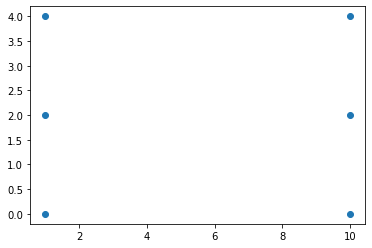

In [4]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Konstruktorska funkcija `KMeans` očekuje broj klastera i inicijalizaciju kojom se utiče na izbor početnih centroida. Postoje i druga podešavanja algoritma, na primer, maksimalani broj iteracija, izbor algoritma inicijalizacije, indikacija paralelizacije i slično. Ovako kreirani model poštuje `fit - predict` princip rada metoda nadgledanog učenja koje smo upoznali u uvodnom delu kursa. Tako se nakon konstruisanja modela pozivom funkcije `fit` vrši grupisanje i pridruživanje labela instancama.

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=2, random_state=0)

Obeležja pripisana instancama se mogu pročitati kroz `labels_` svojstvo naučenog modela ili pozivom funkcije `predict`.

In [6]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [7]:
labels_predicted = kmeans.predict(data)
labels_predicted

array([1, 1, 1, 0, 0, 0], dtype=int32)

Informacije o centroidama klastera se mogu dobiti pomoću svojstva `cluster_centers_`.

In [8]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

Ako labelama pridružimo boje, možemo prikazati i kako dobijeni klasteri izgledaju. Primetimo da su uočena dva polazna klastera sa centroidama koje su obeležene krstićima. 

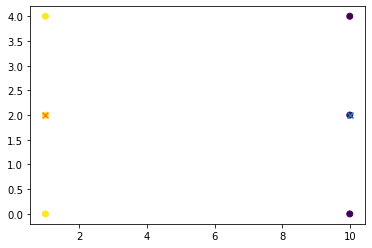

In [9]:
plt.scatter(data[:, 0], data[:, 1], c=labels_predicted)
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], marker='x')
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], marker='x')

Obeležja novih instanci takođe dobijamo korišćenjem `predict` metode.

In [10]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

## Odabir parametra `k` za broj klastera

U praksi obično radimo sa većim skupovima podataka u kojima nije baš uvek intuitivno pretpostaviti broj postojećih klastera. Optimalan broj klastera određujemo tako što pratimo ponašanje modela za različite vrednosti ovog parametra, a potom odaberemo najoptimalniju tj. onu za koju se dobija najmanja vrednost funkcije cilja. 

Funkcija cilja prati rastojanja pojedinačnih instanci od centroida klastera, a sam algoritam raspoređuje instance tako da minimizuje kumulativnu sumu ovih rastojanja.

<img src='assets/k-means_objective.png'>

Funkcija `make_blobs` biblioteke scikit-learn omogućava kreiranje testnih skupova podataka. Njeni argumenti su ukupan broj instanci skupa (`n_samples` parametar), veličina prostora atributa (`n_features` parametar), broj centroida tj. klastera (`centers` parametar) i parametar kojim se utiče na izbor njihovog raspoređivanja (`random_state` parametar). Povratne vrednosti funkcije su generisani skup podataka oblika `n_samples x n_features` i njima pridružene labele.

In [11]:
from sklearn.datasets import make_blobs

Funkciju `make_blobs` ćemo iskoristiti za generisanje testnog skupa nad kojim možemo simulirati izbor parametra `k`. Generisaćemo skup od 100 instanci sa po 2 atributa (kako bismo mogli i da ih vizualizujemo) raspoređene u 4 klastera.

In [12]:
X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=6)

In [13]:
X.shape

(100, 2)

U skupu `y` se nalaze obeležja klastera kojem generisane instance iz skupa `X` pripadaju.

In [14]:
y.shape

(100,)

In [15]:
np.unique(y)

array([0, 1, 2, 3])

Prikazaćemo i generisane podatke.

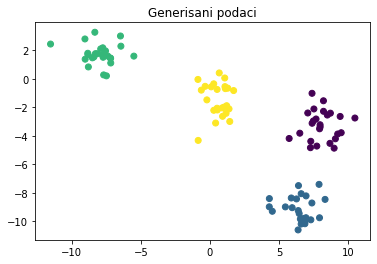

In [16]:
plt.title('Generisani podaci')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

Optimalni broj klastera tražićemo u opsegu od 1 do 10.

In [17]:
Ks = range(1, 10)

Zatim ćemo za svaku vrednost parametra `k` kreirati poseban model i oceniti ga. Ocenu ćemo dobiti korišćenjem bibliotečke funkcije `score` kojom se dobija negativna vrednost funkcije cilja. 

In [18]:
kms = [KMeans(n_clusters=i, random_state=7) for i in Ks]
score = [-km.fit(X).score(X) for km in kms]

Sada možemo generisati grafik dobijenih ocena. 

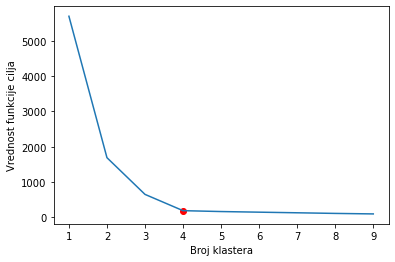

In [19]:
plt.plot(Ks, score)
plt.scatter(4, score[3], c='red')
plt.xlabel('Broj klastera')
plt.ylabel('Vrednost funkcije cilja')
plt.show()

Možemo da zaključimo da je `k = 4` najbolja vrednost parametra jer se nakon toga funkcija cilja stabilizuje, a pre toga ima značajno nepoželjnije vrednosti.

Prikazaćemo rezultate koji se dobijaju korišćenjem ovog modela.

In [20]:
kmeans = KMeans(n_clusters=4, random_state=7)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=7)

In [21]:
y_predicted = kmeans.predict(X)

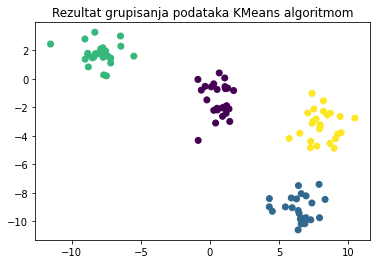

In [22]:
plt.title('Rezultat grupisanja podataka KMeans algoritmom')
plt.scatter(X[:, 0], X[:, 1], c=y_predicted, cmap='viridis')
plt.show()

Možemo uočiti da je ovako dobijeno grupisanje podataka istovetno sa polaznim grupisanjem. 

Negativna vrednost funkcije cilja je: 

In [23]:
kmeans.score(X)

-184.19479281496973

Osim vrednosti funkcije cilja, za ocenu kvaliteta grupisanja se mogu koristiti i druge mere. Na primer, ocena siluete (engl. silhouette score) je ocena razdvojenosti generisanih klastera. Za uočenu instancu $i$ pratimo prosečno rastojanje u odnosu na druge instance njenog klastera (obeležimo ga sa `a(i)`), kao i rastojanje do njoj najbližeg klastera tj. njegovog centroida (obeležimo ga sa `b(i)`). Ocena siluete za instancu $i$ se računa kao količnik $\frac{b(i)-a(i)}{max(a(i), b(i))}$. Uprosečavanjem vrednosti za sve instance, dobija se ukupna ocena klasterovanja. Vrednosti ocena su u intervalu od -1 do 1: one koje su bliže jedinici ukazuju na dobro grupisane razdvojene klastere, vrednosti bliske nuli ukazuju na klastere čije su granice dodiruju, dok vrednosti bliske donjoj granici ukazuju na pogreške u grupisanju.

<img src='assets/silhouette_score.jpeg' style='width: 600px'>

Podrška za izračunavanje ove metrike dolazi kroz `metrics` paket biblioteke `scikit-learn`. Za ocenu pojedinačnih instanci koristi se funkcija `silhouette_samples`, dok se za ukupnu ocenu koristi funkcija `silhouette_score`.

In [24]:
from sklearn import metrics

Ocene za sve instance pojedinačno: 

In [25]:
metrics.silhouette_samples(X, y_predicted)

array([0.81797346, 0.71013718, 0.77830956, 0.69797454, 0.64475949,
       0.77769161, 0.77559151, 0.82846262, 0.87220325, 0.80576724,
       0.5850857 , 0.82386625, 0.75730885, 0.84428581, 0.61415945,
       0.82891207, 0.72390437, 0.79178762, 0.77376331, 0.73061844,
       0.76620935, 0.80565898, 0.82814824, 0.52178042, 0.77035256,
       0.85857657, 0.74832925, 0.6822809 , 0.68363343, 0.74308703,
       0.56221495, 0.84067244, 0.77984308, 0.72061402, 0.44861655,
       0.87488216, 0.79465834, 0.74060541, 0.81725629, 0.61030392,
       0.76789154, 0.81060455, 0.75824972, 0.80236764, 0.87686468,
       0.56023074, 0.81948301, 0.63418228, 0.8425489 , 0.78424676,
       0.7829465 , 0.40767157, 0.72168173, 0.80623081, 0.5700652 ,
       0.77723903, 0.74664429, 0.86544259, 0.82231757, 0.62248423,
       0.67185871, 0.74850025, 0.72661645, 0.77981761, 0.87048269,
       0.80144766, 0.76543369, 0.80447794, 0.6118415 , 0.78047062,
       0.81737311, 0.74434311, 0.63891084, 0.88029281, 0.76036

In [26]:
np.mean(metrics.silhouette_samples(X, y_predicted))

0.752482917021306

Ocene za sve klastere: 

In [27]:
metrics.silhouette_score(X, y_predicted, random_state=7)

0.752482917021306